# Leme maximum and mininum historical temperatures 

All the data was collected from [CPTEC heat maps](http://clima1.cptec.inpe.br/monitoramentobrasil/pt) using a open source Lumen [API/extractor](https://github.com/gustapinto/cptec-data-extractor)

In [1]:
import requests
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = [24, 10]

extractor_host = 'https://cptecextractor.gustapinto.dev/api'
extractor_max_temp_endpoint = extractor_host + '/export/kind=tempmax'
extractor_min_temp_endpoint = extractor_host + '/export/kind=tempmin'

max_temp_json_list = requests.get(extractor_max_temp_endpoint).json()
min_temp_json_list = requests.get(extractor_min_temp_endpoint).json()

max_temp_data_frame = pd.DataFrame(max_temp_json_list).dropna()
min_temp_data_frame = pd.DataFrame(min_temp_json_list).dropna()

## Max temperatures

### History

<AxesSubplot:xlabel='year', ylabel='temperature'>

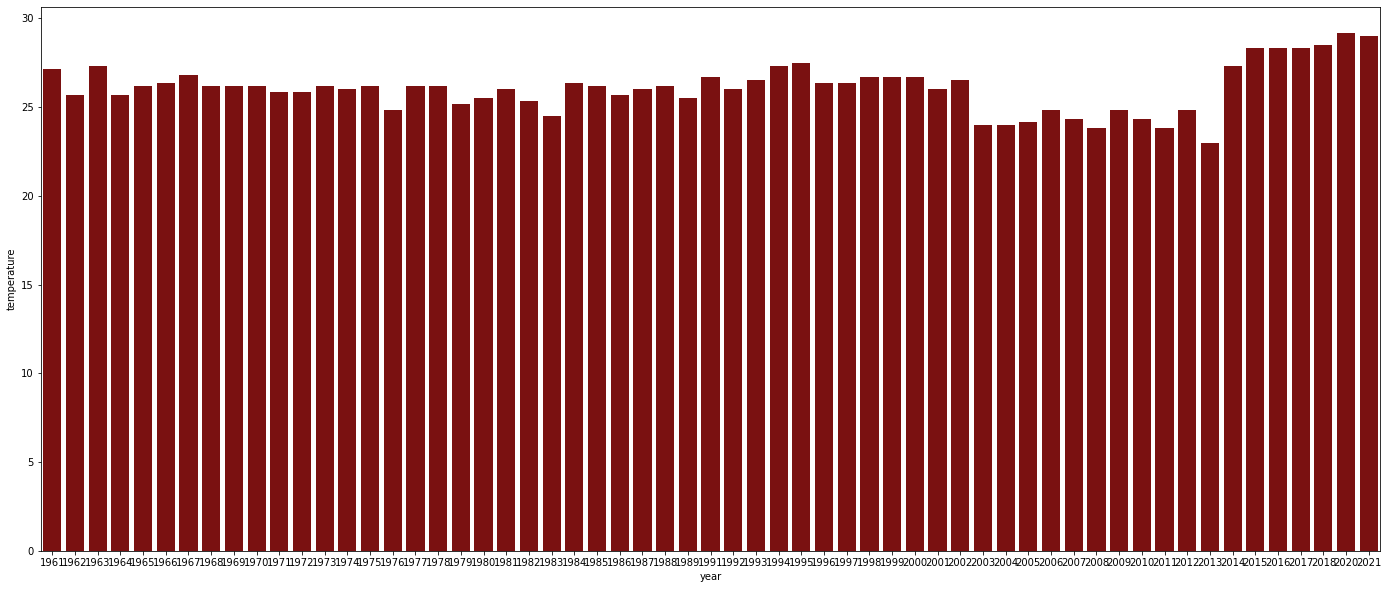

In [15]:
avg_df = max_temp_data_frame.drop(labels=['year', 'kind'], axis=1) \
                            .mean(axis=1) \
                            .to_frame('temperature')
avg_df['year'] = max_temp_data_frame['year']

sbn.barplot(data=avg_df, x='year', y='temperature', color='darkred')

### Heat map

<AxesSubplot:ylabel='year'>

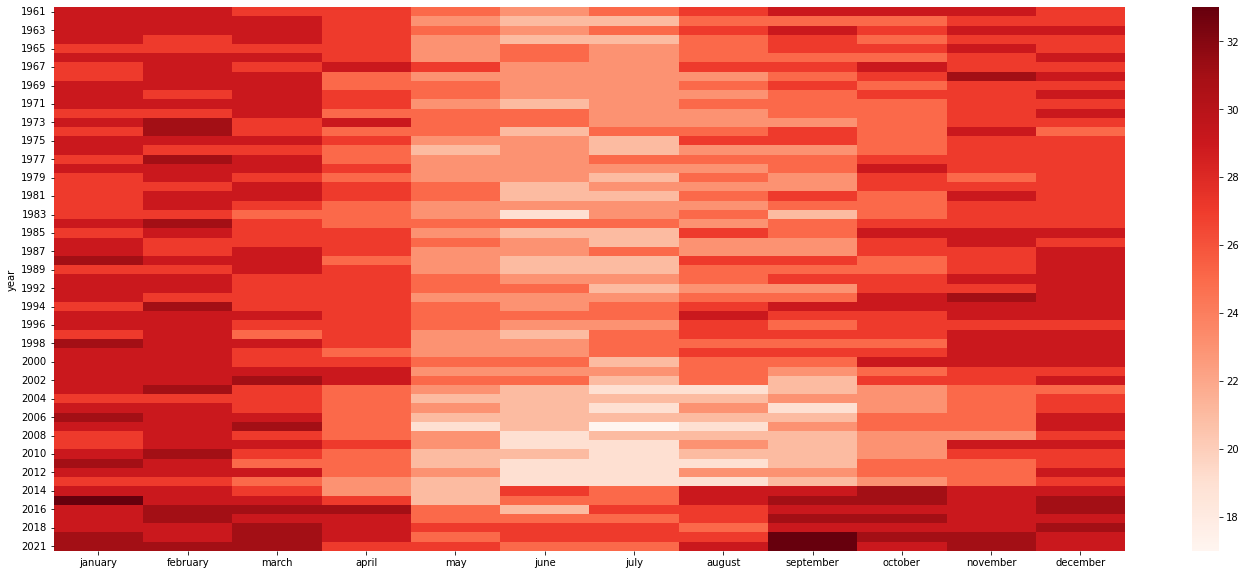

In [3]:
df_without_kind = max_temp_data_frame.set_index('year').drop(labels='kind', axis=1)

sbn.heatmap(df_without_kind, cmap='Reds')

## Minimum temperatures

### History

<AxesSubplot:xlabel='year', ylabel='temperature'>

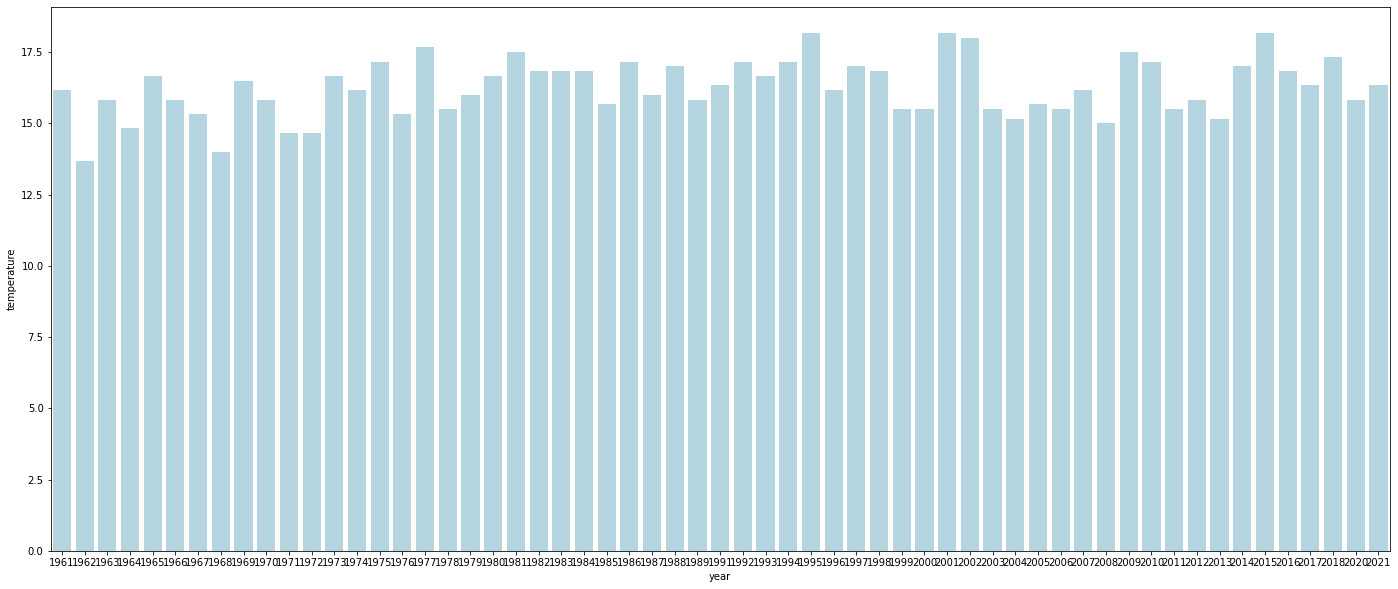

In [13]:
avg_df = min_temp_data_frame.drop(labels=['year', 'kind'], axis=1) \
                            .mean(axis=1) \
                            .to_frame('temperature')
avg_df['year'] = min_temp_data_frame['year']

sbn.barplot(data=avg_df, x='year', y='temperature', color='lightblue')

### Heat map

<AxesSubplot:ylabel='year'>

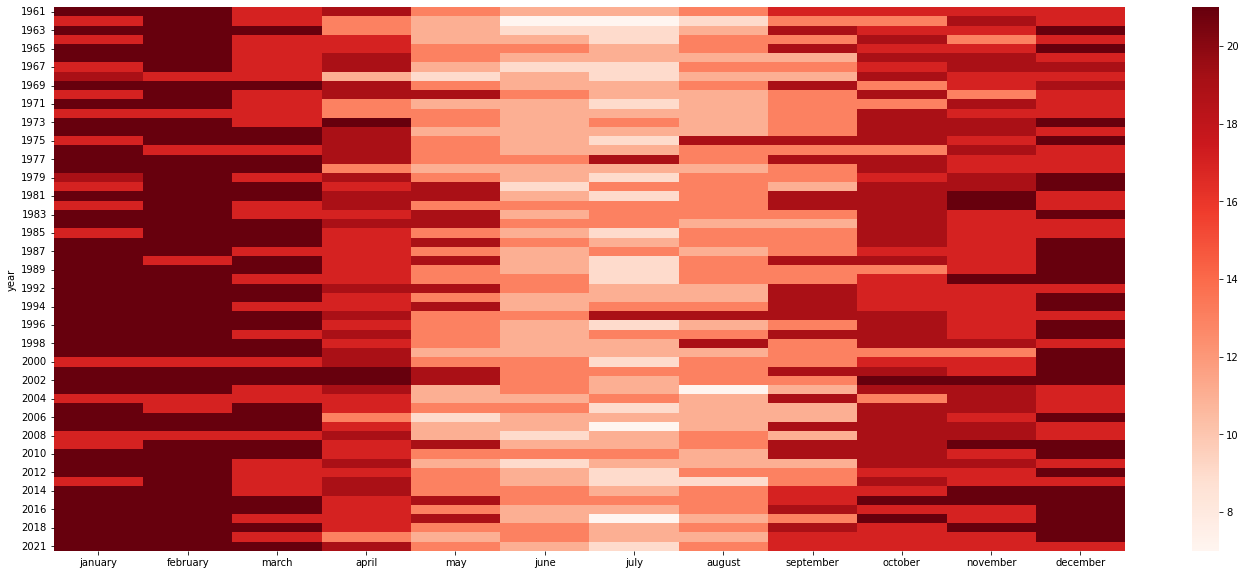

In [16]:
df_without_kind = min_temp_data_frame.set_index('year').drop(labels='kind', axis=1)

sbn.heatmap(df_without_kind, cmap='Blues')